## How many individual calls reach a block of content that is not the digest or menu?

by Jack Wright

This notebook defines a function that will return the percent of callers from a country that reach a block of content that is not a menu or digest



In [20]:
# connect to the database using the credentials
import os
import pandas as pd
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'credentials.json'

In [21]:
query = """
SELECT
*
FROM `viamo-datakind.datadive.321_sessions_1122`

ORDER BY RAND()
LIMIT 1000
"""

test_df = pd.read_gbq(query)

<AxesSubplot:>

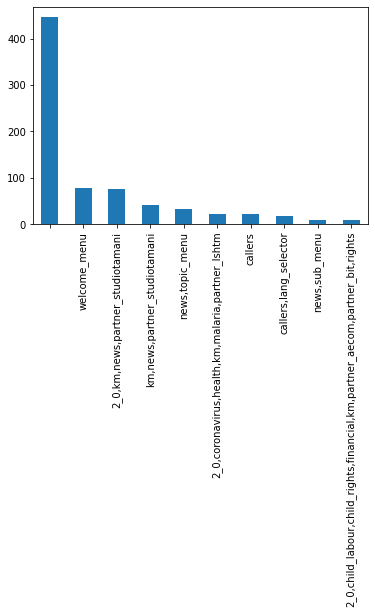

In [22]:

block_tags = test_df.block_tags.unique()

#histogram of top 10 block tags
test_df.block_tags.value_counts().head(10).plot(kind='bar')


In [23]:
#block tags that contain digest or menu
digest_menu = test_df[test_df.block_tags.str.contains('digest', case=False)]

print(digest_menu['block_tags'])


436    2_0,ba,coronavirus,covid_digest,health,km,part...
474    2_0,ba,coronavirus,covid_digest,health,km,part...
569    2_0,ba,coronavirus,covid_digest,health,km,part...
631    2_0,ak_digest,albishirinku,ba,complementary_fe...
633    ba,coronavirus,covid_digest,health,health_dige...
649    2_0,ak_digest,albishirinku,ba,drama,health,km,...
727    2_0,ak_digest,albishirinku,ba,covid_prevention...
Name: block_tags, dtype: object


my plan is to query the db for a count of calls that contain a digest or menu and then return a percentage. 

In [24]:
# connect to the database using the credentials
import os
import pandas as pd
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'credentials.json'

In [25]:
def menu_digest_percentage(country):
    country = '"'+country+'"'
    query = """
SELECT
count(block_tags) as count
FROM `viamo-datakind.datadive.321_sessions_1122`
WHERE
organization_country = {}
AND
((block_tags LIKE '%menu%')
OR (block_tags LIKE '%digest%'))

""".format(country)
    df =pd.read_gbq(query)
    md = df['count'].values[0]

    query = """
SELECT
count(*) as count
FROM `viamo-datakind.datadive.321_sessions_1122`
WHERE NOT  block_tags =''
AND organization_country = {}

""".format(country)
    df =pd.read_gbq(query)
    t = df['count'].values[0]
    return md/t

In [26]:
# connect to the database using the credentials
import os
import pandas as pd
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'credentials.json'

uganda = menu_digest_percentage('Uganda')
mali = menu_digest_percentage('Mali')
nigeria = menu_digest_percentage('Nigeria')

In [27]:
print('Uganda: ', 1 - uganda, 'Mali: ', 1 - mali, 'Nigeria: ', 1 - nigeria)

Uganda:  0.5832817804275146 Mali:  0.6717901850125438 Nigeria:  0.7879801046792891
